## Road to Visualization Expert

### Part 3 : Geo with Plotly

This time it's a visualization of military costs.

In this kernel, we are going to use map visualization and new visualization tools.

![Military](https://thumbor.forbes.com/thumbor/960x0/https%3A%2F%2Fblogs-images.forbes.com%2Fniallmccarthy%2Ffiles%2F2017%2F04%2F20170424_Military_Expenditure.jpg)

I would like to record my practice to become an expert in data visualization.

- [Road to Viz Expert (1) - Unusual tools](https://www.kaggle.com/subinium/road-to-viz-expert-1-unusual-tools)
- [Road to Viz Expert (2) - Plotly & Seaborn](https://www.kaggle.com/subinium/road-to-viz-expert-2-plotly-seaborn)

**plotly express is amazing.**

**Table of Contents**

- EDA & Preprocessing
    - missingno : color change
    - go.Table
    - Pandas Tricks (melt, rename, etc)
- Map with Scatter&Bubble : px.scatter_geo
    - default
    - projection
    - color
    - size
    - animation
- Choropleth : px.choropleth
    - default
    - range_color
    - animation
- Network&Line Graph on Map : px.line_geo
    - default

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import os
print(os.listdir('../input/military-expenditure-of-countries-19602019'))

['Military Expenditure.csv']


## EDA & Preprocessing

In [2]:
data = pd.read_csv('../input/military-expenditure-of-countries-19602019/Military Expenditure.csv')
data.head()

,Name,Code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,2.518695e+08,2.981469e+08,3.258070e+08,2.385834e+08,2.171941e+08,2.682271e+08,1.995186e+08,1.858783e+08,1.914071e+08,1.980863e+08
2,Angola,AGO,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,3.311193e+09,3.500795e+09,3.639496e+09,4.144635e+09,6.090752e+09,6.841864e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09
3,Albania,ALB,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,1.827369e+08,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08
4,Andorra,AND,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- [misingno | Advanced Configuration](https://github.com/ResidentMario/missingno/blob/1ef039cda6f77232f78ced4f1cfff15c53e300e8/CONFIGURATION.md)

You can change missingno matrix color by using `color` parameter.

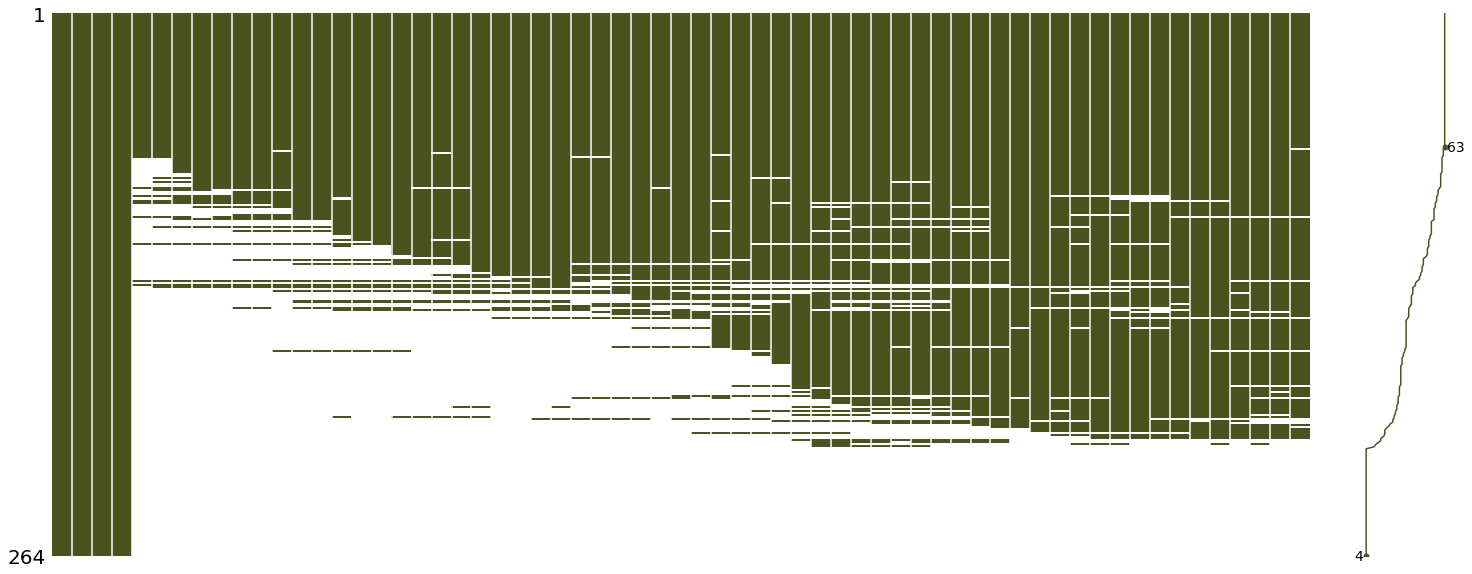

In [3]:
import missingno as msno
data2 = msno.nullity_sort(data, sort='descending')
msno.matrix(data2, color=(0.294, 0.325, 0.125)) #color : Army 

You can make country list by using `go.Table` + `reshape method`.

In [4]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(cells=dict(values=data['Name'].values.reshape(12, 22)))])
fig.update_layout(title=f'Countries Name List ({data.shape[0]})')
fig.show()

The indicators don't seem to mean much to me. If you look at it, you can see that there is only one content. Let's drop this.

In [5]:
print(f"There are {len(data['Indicator Name'].unique())} types of indicator in this dataset.")

There are 1 types of indicator in this dataset.


In [6]:
data.drop(['Indicator Name'], axis=1, inplace=True)
data.head()

,Name,Code,Type,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,ABW,Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.518695e+08,2.981469e+08,3.258070e+08,2.385834e+08,2.171941e+08,2.682271e+08,1.995186e+08,1.858783e+08,1.914071e+08,1.980863e+08
2,Angola,AGO,Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.311193e+09,3.500795e+09,3.639496e+09,4.144635e+09,6.090752e+09,6.841864e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09
3,Albania,ALB,Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.827369e+08,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08
4,Andorra,AND,Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I want to add `continent` column.

Use `px` default dataset : `px.data.gapminder()`

In [7]:
third_data = px.data.gapminder()
third_data.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


To merge 2 pandas dataset, preprocessing first.
I use `drop_duplicates`(remove duplicates raws) + `merge`

In [8]:
code_continent = third_data[['iso_alpha', 'continent']].drop_duplicates()
code_continent.rename(columns={'iso_alpha':'Code'}, inplace=True)
code_continent.head()

,Code,continent
0,AFG,Asia
12,ALB,Europe
24,DZA,Africa
36,AGO,Africa
48,ARG,Americas


In [9]:
clean_data = pd.merge(data, code_continent , how='left')
clean_data.head()

,Name,Code,Type,1960,1961,1962,1963,1964,1965,1966,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,continent
0,Aruba,ABW,Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.981469e+08,3.258070e+08,2.385834e+08,2.171941e+08,2.682271e+08,1.995186e+08,1.858783e+08,1.914071e+08,1.980863e+08,Asia
2,Angola,AGO,Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.500795e+09,3.639496e+09,4.144635e+09,6.090752e+09,6.841864e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09,Africa
3,Albania,ALB,Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08,Europe
4,Andorra,AND,Country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
clean_data['continent'] = clean_data['continent'].fillna('unknown')
clean_data = clean_data.fillna(0)

Draw `Type` countplot with `px.histogram`. 

> if you don't know how to draw countplot with plotly, 
Please refer to this article [link]()

In [11]:
fig = px.histogram(clean_data, x="Type", y="Type", color="Type")
fig.show()

The country is overwhelmingly large, the rest very few. If you visualize, the rest will be buried.

How about continent?

In [12]:
fig = px.histogram(clean_data, x="continent", y="continent", color="continent")
fig.update_layout(title='Continent Distribution')
fig.show()

I can see that more continents are filled than I expected.

And I will change the year data structure to use this data as **time series data**.

Use `melt` method. [link](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-by-melt)

In [13]:
data_time = clean_data.melt(id_vars=['Name', 'Code', 'Type', 'continent'])
data_time.rename(columns={'variable' : 'year'}, inplace=True)
data_time

,Name,Code,Type,continent,year,value
0,Aruba,ABW,Country,unknown,1960,0.000000e+00
1,Afghanistan,AFG,Country,Asia,1960,0.000000e+00
2,Angola,AGO,Country,Africa,1960,0.000000e+00
3,Albania,ALB,Country,Europe,1960,0.000000e+00
4,Andorra,AND,Country,unknown,1960,0.000000e+00
...,...,...,...,...,...,...
15571,Kosovo,XKX,Country,unknown,2018,6.334407e+07
15572,"Yemen, Rep.",YEM,Country,Asia,2018,0.000000e+00
15573,South Africa,ZAF,Country,Africa,2018,3.639879e+09
15574,Zambia,ZMB,Country,Africa,2018,3.780254e+08


Let's check null data again.

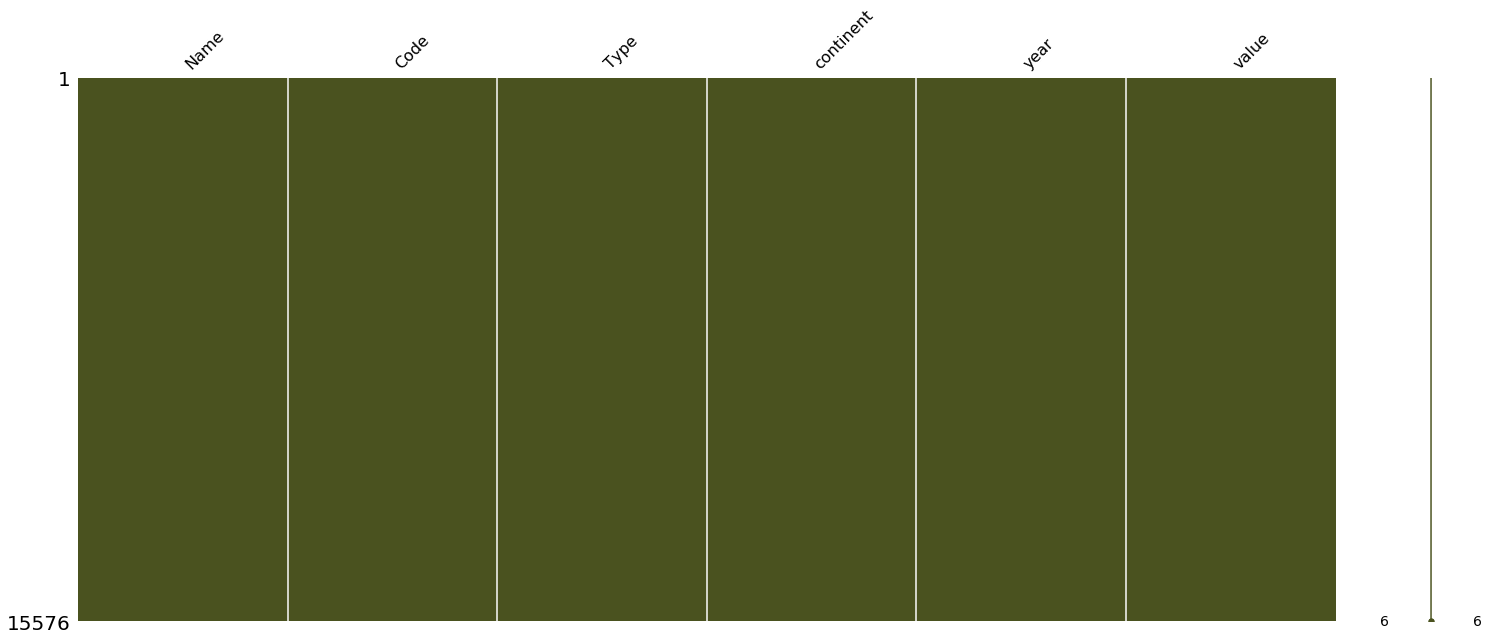

In [14]:
msno.matrix(data_time, color=(0.294, 0.325, 0.125))

Cool! Let's start visualization with `clean_data` and `data_time`!

## Map with Scatter & Bubble : px.scatter_geo

- [px.scatter_geo]()

In [15]:
# type 1 : default graph
# location : country code 
# hover_name : hover information, single column or columns list
import plotly.express as px

fig = px.scatter_geo(clean_data, 
                     locations="Code",
                     hover_name="Name",
                    )
fig.update_layout(title="Simple Map")
fig.show()

In [16]:
# type 2 : projection type change

fig = px.scatter_geo(
    clean_data, 
    locations = 'Code',
    hover_name="Name",
    projection="orthographic",
)

fig.update_layout(title='Orthographic Earth')

fig.show()


In [17]:
# type 2-2 : projection type change

fig = px.scatter_geo(
    clean_data, 
    locations = 'Code',
    hover_name="Name",
    projection="natural earth",
)

fig.update_layout(title='Natural Earth')

fig.show()


In [18]:
# type 3 : change scatter marker size
# size : marker size

fig = px.scatter_geo(
    clean_data, 
    locations = 'Code',
    hover_name="Name",
    size = '2018',
)

fig.show()

I'm going to delete too large values to see more data.

Let's look at the distribution before that.

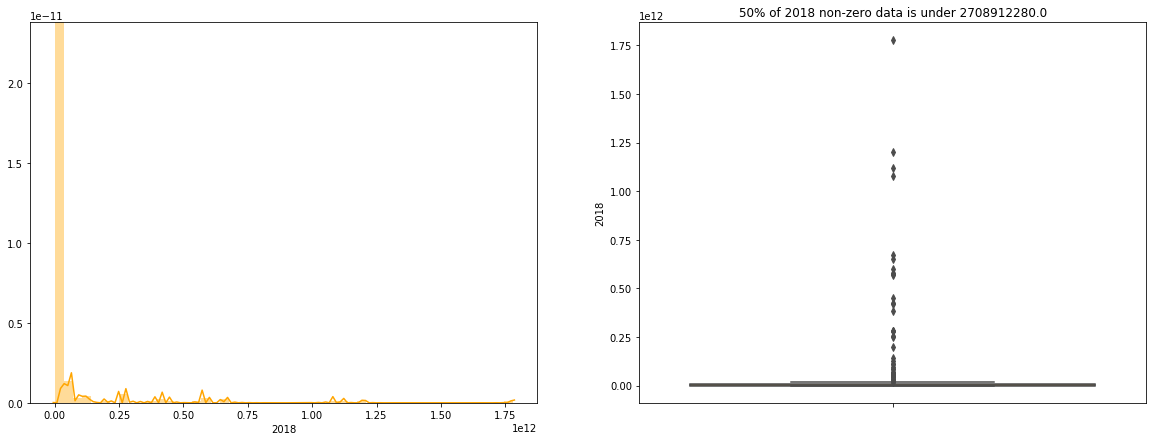

In [19]:
fig, ax = plt.subplots(1, 2,figsize=(20, 7))
sns.distplot(clean_data['2018'], color='orange', ax=ax[0])
sns.boxplot(y=clean_data['2018'], color='orange', ax=ax[1])
ax[1].set_title("50% of 2018 non-zero data is under {}".format(clean_data[clean_data['2018'] > 0]['2018'].quantile(0.5)))
plt.show()

In [20]:
# type 3-2 : remove outliers

fig = px.scatter_geo(
    clean_data[clean_data['2018'] < 0.3 * 1e12 ], 
    locations = 'Code',
    hover_name="Name",
    size = '2018',
    projection="natural earth",
)

fig.show()

You can also color to whatever category you want.

In [21]:
# type 4 : color

fig = px.scatter_geo(
    clean_data, 
    locations = 'Code',
    hover_name="Name",
    color = 'continent'
)

fig.show()

I think we can use KNN(K-Nearest Neigbors) to fill continent (except russia)

In [22]:
# type 4-2 : color with size

fig = px.scatter_geo(
    clean_data[clean_data['2018'] < 0.2 * 1e12 ], 
    locations = 'Code',
    hover_name="Name",
    size='2018',
    color = 'continent'
)

fig.show()

In [23]:
# type 5 : animation with year
fig = px.scatter_geo(data_time, locations="Code", color="continent",
                     hover_name="Name", size="value",
                     animation_frame="year",
                     projection="natural earth")

fig.update_layout(title='Animation but USA...')
fig.show()


The result I wanted was the following ...

There's a certain outlier in this dataset.

In [24]:
# type 5-2 : animation with default data
# this is population dataset
gapminder = px.data.gapminder()
fig = px.scatter_geo(gapminder, locations="iso_alpha", color="continent",
                     hover_name="country", size="pop",
                     animation_frame="year", 
                     projection="natural earth")
fig.show()


## Choropleth : px.choropleth

> A **choropleth map** is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map, such as population density or per-capita income. [Wikipedia](https://en.wikipedia.org/wiki/Choropleth_map)

Almost same as `px.scatter_geo`

You can use `range_color` to limit scale. 



In [25]:
# type 1 : default choropleth
fig = px.choropleth(clean_data, locations="Code", color="2018",
                     hover_name="Name", 
                    range_color=[0,10000000000],
                     projection="natural earth")

fig.update_layout(title='Choropleth Graph')
fig.show()


Similar as `scatter_geo`, you can make animation with `year` data (or another time-series feature)

In [26]:
# type 2 : choropleth with animation

fig = px.choropleth(data_time, locations="Code", color="value",
                     hover_name="Name", 
                    range_color=[0,1000000000],
                    animation_frame='year')

fig.update_layout(title='Choropleth Graph Animation')
fig.show()


## Network & Line : px.line_geo 

Like Airplane route, it needs line graph on map.

You can use `px.line_geo`

In [27]:
# type 1 : default
fig = px.line_geo(clean_data[clean_data['continent'] !='unknown'], 
                  locations="Code", 
                  color="continent")
fig.show()

## TO BE CONTINUE ...
The kernel is still in progress.

## Pre-Conclusion

- USA is powerful...